# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [6]:
df = pd.read_csv("rym_top5000.csv")

In [7]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [8]:
df = df.rename(columns = {"Artist Name": "artistName",
                          "Release Date" : "releaseDate",
                          "Average Rating": "averageRating",
                          "Number of Ratings" : "numberOfRatings",
                          "Number of Reviews" : "numberOfReviews"})
df['numberOfRatings']=df['numberOfRatings'].str.replace(',','').astype(int)

In [20]:
ex1 = df.groupby("artistName").agg(median=("averageRating", "median"),number_of_albums=("Album", "count")).reset_index()
ex1 = ex1.loc[ex1.number_of_albums>5]
ex1.sort_values("median").tail(10)[::-1].reset_index(drop = True)

,artistName,median,number_of_albums
0,David Bowie,4.050,8
1,The Beatles,4.045,10
2,King Crimson,3.970,7
3,The Rolling Stones,3.965,6
4,Black Sabbath,3.950,8
5,Led Zeppelin,3.940,6
6,Pink Floyd,3.910,8
7,Death,3.905,6
8,John Coltrane,3.905,14
9,Radiohead,3.890,7


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [14]:
ex2 = df.groupby("artistName").agg(max_rating =("averageRating", "max"),min_rating=("averageRating", "min")).reset_index()
ex2["diff"] = ex2["max_rating"]-ex2["min_rating"]
ex2.sort_values("diff").tail(10)[::-1].reset_index(drop = True)

,artistName,max_rating,min_rating,diff
0,Kendrick Lamar,4.27,3.52,0.75
1,The Beatles,4.25,3.55,0.70
2,Pink Floyd,4.29,3.60,0.69
3,My Bloody Valentine,4.24,3.58,0.66
4,King Crimson,4.30,3.67,0.63
5,John Coltrane,4.30,3.70,0.60
6,Radiohead,4.23,3.66,0.57
7,Miles Davis,4.23,3.69,0.54
8,The Cure,4.17,3.63,0.54
9,Kanye West,4.07,3.54,0.53


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [15]:
ex3 = df.loc[(df.numberOfRatings>5000)&(df.numberOfReviews>15)]
ex3["ratingsOverReviews"] = ex3["numberOfRatings"] / ex3["numberOfReviews"]
ex3.sort_values("ratingsOverReviews").tail(10)[::-1].reset_index(drop = True)

<ipython-input-15-37ad05c292c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex3["ratingsOverReviews"] = ex3["numberOfRatings"] / ex3["numberOfReviews"]


,Ranking,Album,artistName,releaseDate,Genres,Descriptors,averageRating,numberOfRatings,numberOfReviews,ratingsOverReviews
0,354.0,Jenny Death: The Powers That B Disc 2,Death Grips,19 March 2015,"Experimental Hip Hop, Noise Rock, Industrial H...","noisy, abstract, aggressive, male vocals, mani...",3.90,10855,30,361.833333
1,1696.0,Bury Me at Makeout Creek,Mitski,11 November 2014,"Indie Rock, Singer/Songwriter","lonely, anxious, passionate, suicide, raw, fem...",3.77,5856,19,308.210526
2,3734.0,春と修羅 (Haru to Shura),春ねむり [Haru Nemuri],11 April 2018,"Noise Pop, J-Rock, J-Pop","female vocals, energetic, passionate, rhythmic...",3.67,6277,23,272.913043
3,4950.0,Saturation,Brockhampton,9 June 2017,"Pop Rap, West Coast Hip Hop","eclectic, boastful, male vocals, LGBT, vulgar,...",3.55,17629,70,251.842857
4,1037.0,Saturation III,Brockhampton,15 December 2017,"Pop Rap, West Coast Hip Hop","quirky, male vocals, introspective, LGBT, boas...",3.74,17118,68,251.735294
5,2490.0,Scenery,福居良 [Ryo Fukui],1976,Hard Bop,"instrumental, playful, warm, summer, happy, me...",3.73,5968,24,248.666667
6,644.0,Endless,Frank Ocean,9 April 2018,"Ambient Pop, Alternative R&B, Art Pop","atmospheric, ethereal, mellow, male vocals, me...",3.85,8911,39,228.487179
7,2870.0,Imperial,Denzel Curry,9 March 2016,"Southern Hip Hop, Trap","angry, political, aggressive, crime, urban, dr...",3.66,11271,50,225.420000
8,951.0,Saturation II,Brockhampton,25 August 2017,"Pop Rap, West Coast Hip Hop","LGBT, boastful, summer, male vocals, playful, ...",3.74,18322,85,215.552941
9,440.0,Bottomless Pit,Death Grips,6 May 2016,"Industrial Hip Hop, Abstract Hip Hop, Experime...","aggressive, chaotic, noisy, manic, energetic, ...",3.82,20614,102,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [36]:
ex4a = df.loc[df.numberOfReviews > df["numberOfReviews"].quantile(0.75)]
ex4a["year"] = pd.to_datetime(ex4a["releaseDate"]).dt.strftime('%Y')
ex4a.groupby(ex4a.year).size().sort_values().tail(5)[::-1]

<ipython-input-36-c7be779669cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex4a["year"] = pd.to_datetime(ex4a["releaseDate"]).dt.strftime('%Y')


year
1970    43
1971    41
1969    38
1994    36
1973    34
dtype: int64

In [37]:
ex4b = df.loc[df.numberOfRatings > df["numberOfRatings"].quantile(0.75)]
ex4b["year"] = pd.to_datetime(ex4b["releaseDate"]).dt.strftime('%Y')
ex4b.groupby(ex4b.year).size().sort_values().tail(5)[::-1]

<ipython-input-37-6dbd24fe870d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex4b["year"] = pd.to_datetime(ex4b["releaseDate"]).dt.strftime('%Y')


year
1994    41
1971    36
1970    35
1996    34
1995    33
dtype: int64

## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [10]:
top_artists = df.loc[df["numberOfReviews"] >= 15].loc[df["numberOfRatings"] >= 5000].groupby("artistName").agg({"numberOfRatings":"sum", "numberOfReviews": "sum"}).reset_index()
top_artists["Ratio"] =  top_artists["numberOfRatings"]/top_artists["numberOfReviews"]
sorted_top_artists = top_artists.sort_values("Ratio", ascending=False).head(10)[["artistName", "Ratio"]]

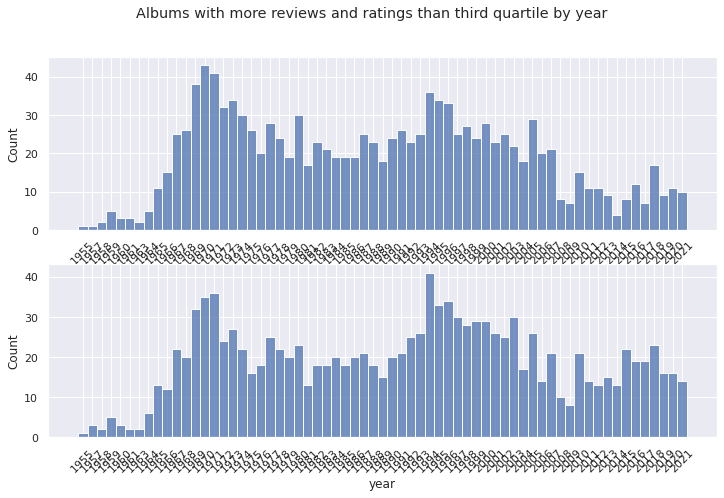

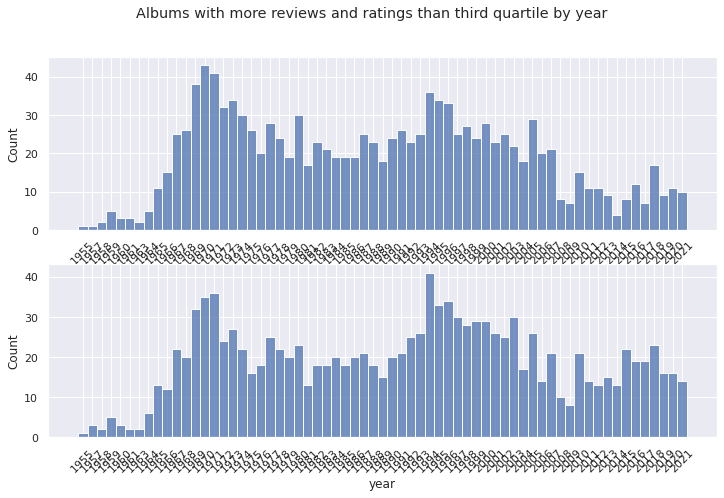

In [53]:
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)
fig, ax = plt.subplots(2)
plot1 = sns.histplot(ax=ax[0], x = ex4a.year.sort_values(), bins = 20)
plot2 = sns.histplot(ax=ax[1], x = ex4b.year.sort_values(), bins = 20)
plt.setp(plot1.get_xticklabels(), rotation=45)
plt.setp(plot2.get_xticklabels(), rotation=45)
fig.suptitle("Albums with more reviews and ratings than third quartile by year")
fig

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 